In [79]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, RobustScaler
import scipy
import joblib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


In [59]:
data = pd.read_csv('../DATA/joined_data.csv')
data


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.5,0.510,0.25,1.70,0.048,39.0,177.0,0.99212,3.28,0.57,10.6,5
1,6.8,0.370,0.51,11.80,0.044,62.0,163.0,0.99760,3.19,0.44,8.8,5
2,5.8,0.250,0.24,13.30,0.044,41.0,137.0,0.99720,3.34,0.42,9.5,5
3,8.1,0.785,0.52,2.00,0.122,37.0,153.0,0.99690,3.21,0.69,9.3,5
4,7.0,0.260,0.34,10.90,0.038,25.0,84.0,0.99432,3.11,0.34,10.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,5.4,0.460,0.15,2.10,0.026,29.0,130.0,0.98953,3.39,0.77,13.4,8
6493,7.2,0.605,0.02,1.90,0.096,10.0,31.0,0.99500,3.46,0.53,11.8,6
6494,6.1,0.270,0.32,1.10,0.034,24.0,110.0,0.98980,3.36,0.40,12.5,6
6495,6.7,0.700,0.08,3.75,0.067,8.0,16.0,0.99334,3.43,0.52,12.6,5


In [60]:
def scaler_by_columns(data):
    pass


In [77]:
def spreed_show(data, nr, nc, c):
    fig = plt.figure(tight_layout=True)
    fig.set_figheight(10)
    fig.set_figwidth(25)
    gs = gridspec.GridSpec(nr, nc)
    for i in range(nr):
        for j in range(nc):
            ax = fig.add_subplot(gs[i, j])
            ax.hist(data[c[i+j]])
            ax.set_title(c[i+j])
            ax.axvline(data[c[i+j]].mean(), color='green', linestyle='-')
            ax.axvline(data[c[i+j]].median(), color='red', linestyle='-')
            # print(c[i+j])
            # print('\t', data[c[i+j]].to_numpy().mean())
            # print('\t', np.median(data[c[i+j]].to_numpy()))
            # print('\t', scipy.stats.mode(data[c[i+j]].to_numpy()))
    fig.show()


# Standart scaler

In [61]:
standart_scaler = StandardScaler().fit(data)
standart_scaled_data = pd.DataFrame(standart_scaler.transform(data), columns=data.columns)
standart_scaled_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.551792,1.034686,-0.472334,-0.786818,-0.229336,0.477500,1.083831,-0.859324,0.382517,0.260304,0.090724,-0.937230
1,-0.320370,0.184263,1.316985,1.336174,-0.343521,1.773418,0.836120,0.968292,-0.177272,-0.613385,-1.418558,-0.937230
2,-1.091777,-0.544672,-0.541153,1.651470,-0.343521,0.590188,0.376086,0.834889,0.755710,-0.747799,-0.831615,-0.937230
3,0.682458,2.705162,1.385805,-0.723758,1.883084,0.364811,0.659184,0.734837,-0.052874,1.066785,-0.999313,-0.937230
4,-0.166089,-0.483928,0.147046,1.146997,-0.514799,-0.311320,-0.561677,-0.125610,-0.674862,-1.285453,0.342271,0.207999
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,-1.400339,0.730964,-1.160533,-0.702739,-0.857353,-0.085943,0.252230,-1.723106,1.066704,1.604440,2.438496,2.498456
6493,-0.011808,1.611760,-2.055193,-0.744778,1.140882,-1.156484,-1.499439,0.101175,1.502096,-0.008524,1.096912,0.207999
6494,-0.860355,-0.423183,0.009406,-0.912936,-0.628984,-0.367664,-0.101642,-1.633059,0.880108,-0.882212,1.683855,0.207999
6495,-0.397511,2.188833,-1.642273,-0.355913,0.313042,-1.269173,-1.764844,-0.452446,1.315499,-0.075731,1.767704,-0.937230


In [62]:

standart_scaler_res = np.abs(standart_scaled_data.median() - standart_scaled_data.mean())
standart_scaler_res

fixed acidity           0.166089
volatile acidity        0.301694
citric acid             0.059414
residual sugar          0.513561
chlorides               0.257883
free sulfur dioxide     0.085943
total sulfur dioxide    0.039907
density                 0.064489
pH                      0.052874
sulphates               0.142937
alcohol                 0.160823
quality                 0.207999
dtype: float64

In [63]:
def hist_pd(data):
    for i in data.columns:
        print(i, scipy.stats.chisquare(data[i]).pvalue)


In [64]:
hist_pd(standart_scaled_data)

fixed acidity 0.0
volatile acidity 0.0
citric acid 0.0
residual sugar 0.0
chlorides 0.0
free sulfur dioxide 1.0
total sulfur dioxide 1.0
density 1.0
pH 0.0
sulphates 0.0
alcohol 0.0
quality 1.0


array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

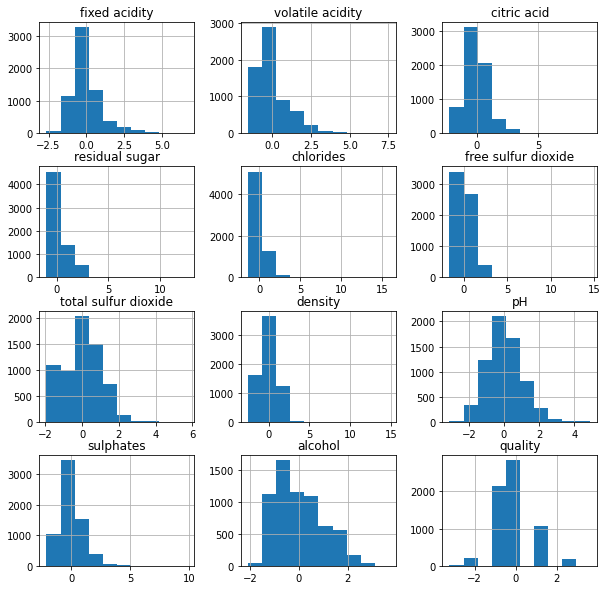

In [65]:
standart_scaled_data.hist(figsize=(10, 10))


C:\Users\Mike\AppData\Local\Temp/ipykernel_14416/2090840957.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


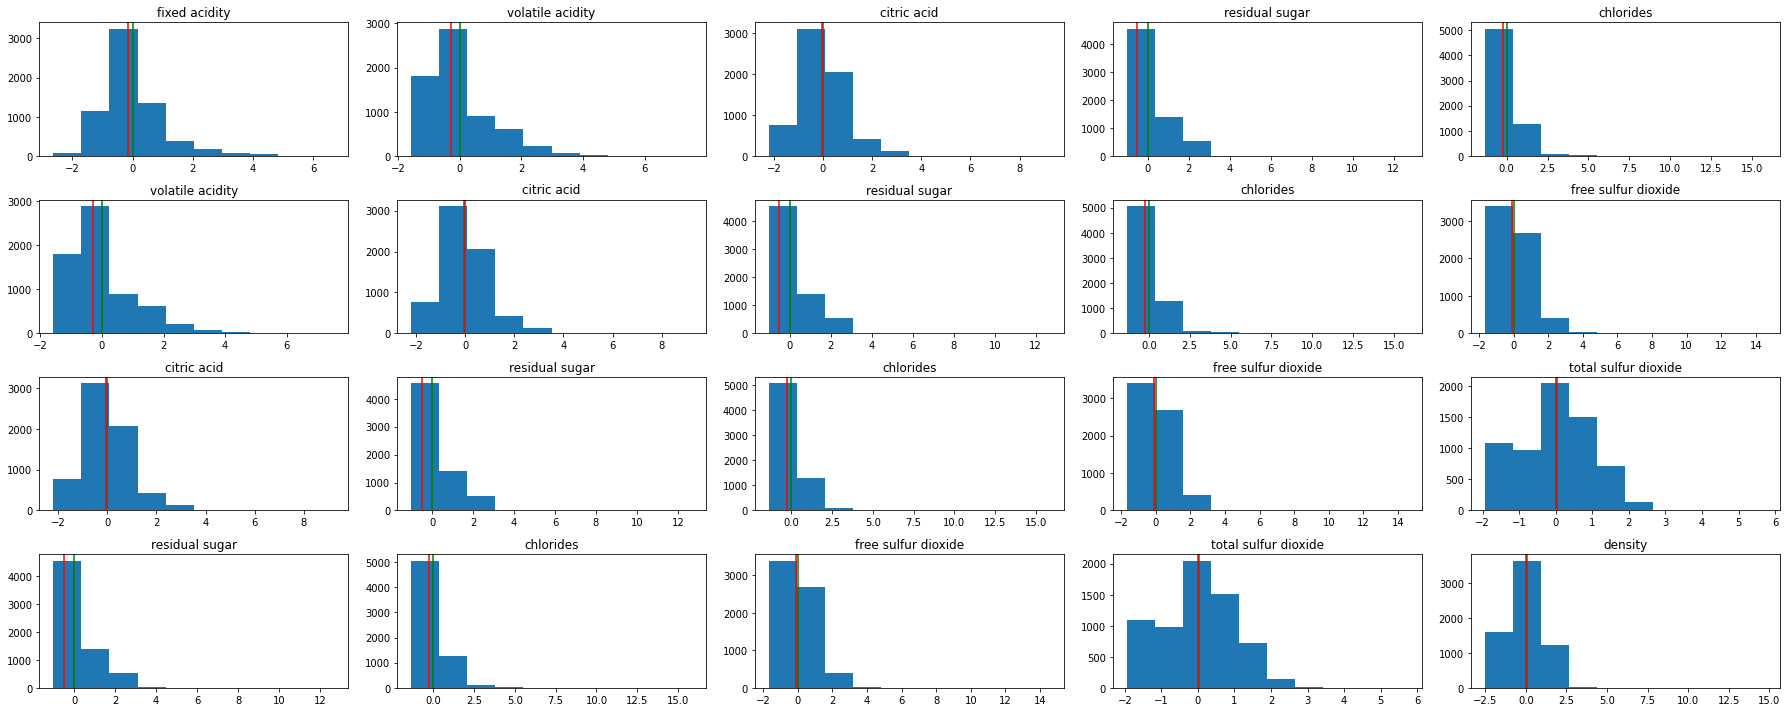

In [81]:
spreed_show(standart_scaled_data, 4, 5, standart_scaled_data.columns)


In [66]:
def tabled_fisher_test(data):
    for i in range(len(data.columns)-1):
        for j in range(i+1, len(data.columns)):
            print(data.columns[i], 
                  data.columns[j], 
                  scipy.stats.fisher_exact(data[np.array([data.columns[i], 
                                                          data.columns[j]])]))


# MinMax scaler

In [67]:
min_max_scaler = MinMaxScaler().fit(data)
min_max_scaled_data = pd.DataFrame(min_max_scaler.transform(data), columns=data.columns)
min_max_scaled_data


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.223140,0.286667,0.150602,0.016871,0.064784,0.131944,0.394009,0.096588,0.434109,0.196629,0.376812,0.333333
1,0.247934,0.193333,0.307229,0.171779,0.058140,0.211806,0.361751,0.202236,0.364341,0.123596,0.115942,0.333333
2,0.165289,0.113333,0.144578,0.194785,0.058140,0.138889,0.301843,0.194525,0.480620,0.112360,0.217391,0.333333
3,0.355372,0.470000,0.313253,0.021472,0.187708,0.125000,0.338710,0.188741,0.379845,0.264045,0.188406,0.333333
4,0.264463,0.120000,0.204819,0.157975,0.048173,0.083333,0.179724,0.139001,0.302326,0.067416,0.420290,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0.132231,0.253333,0.090361,0.023006,0.028239,0.097222,0.285714,0.046655,0.519380,0.308989,0.782609,0.833333
6493,0.280992,0.350000,0.012048,0.019939,0.144518,0.031250,0.057604,0.152111,0.573643,0.174157,0.550725,0.500000
6494,0.190083,0.126667,0.192771,0.007669,0.041528,0.079861,0.239631,0.051860,0.496124,0.101124,0.652174,0.500000
6495,0.239669,0.413333,0.048193,0.048313,0.096346,0.024306,0.023041,0.120108,0.550388,0.168539,0.666667,0.333333


In [68]:

min_max_res = np.abs(min_max_scaled_data.median() - min_max_scaled_data.mean())
min_max_res


fixed acidity           0.017794
volatile acidity        0.033111
citric acid             0.005201
residual sugar          0.037473
chlorides               0.015006
free sulfur dioxide     0.005296
total sulfur dioxide    0.005197
density                 0.003728
pH                      0.006590
sulphates               0.011948
alcohol                 0.027797
quality                 0.030270
dtype: float64

In [69]:
def hist_pd(data):
    for i in data.columns:
        print(i, scipy.stats.chisquare(data[i]).pvalue)


In [70]:
hist_pd(standart_scaled_data)

fixed acidity 0.0
volatile acidity 0.0
citric acid 0.0
residual sugar 0.0
chlorides 0.0
free sulfur dioxide 1.0
total sulfur dioxide 1.0
density 1.0
pH 0.0
sulphates 0.0
alcohol 0.0
quality 1.0


array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

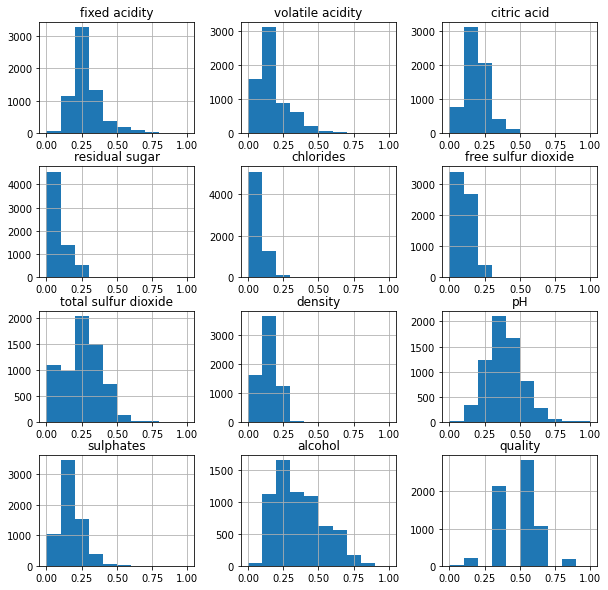

In [76]:
min_max_scaled_data.hist(figsize=(10, 10))

C:\Users\Mike\AppData\Local\Temp/ipykernel_14416/2090840957.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


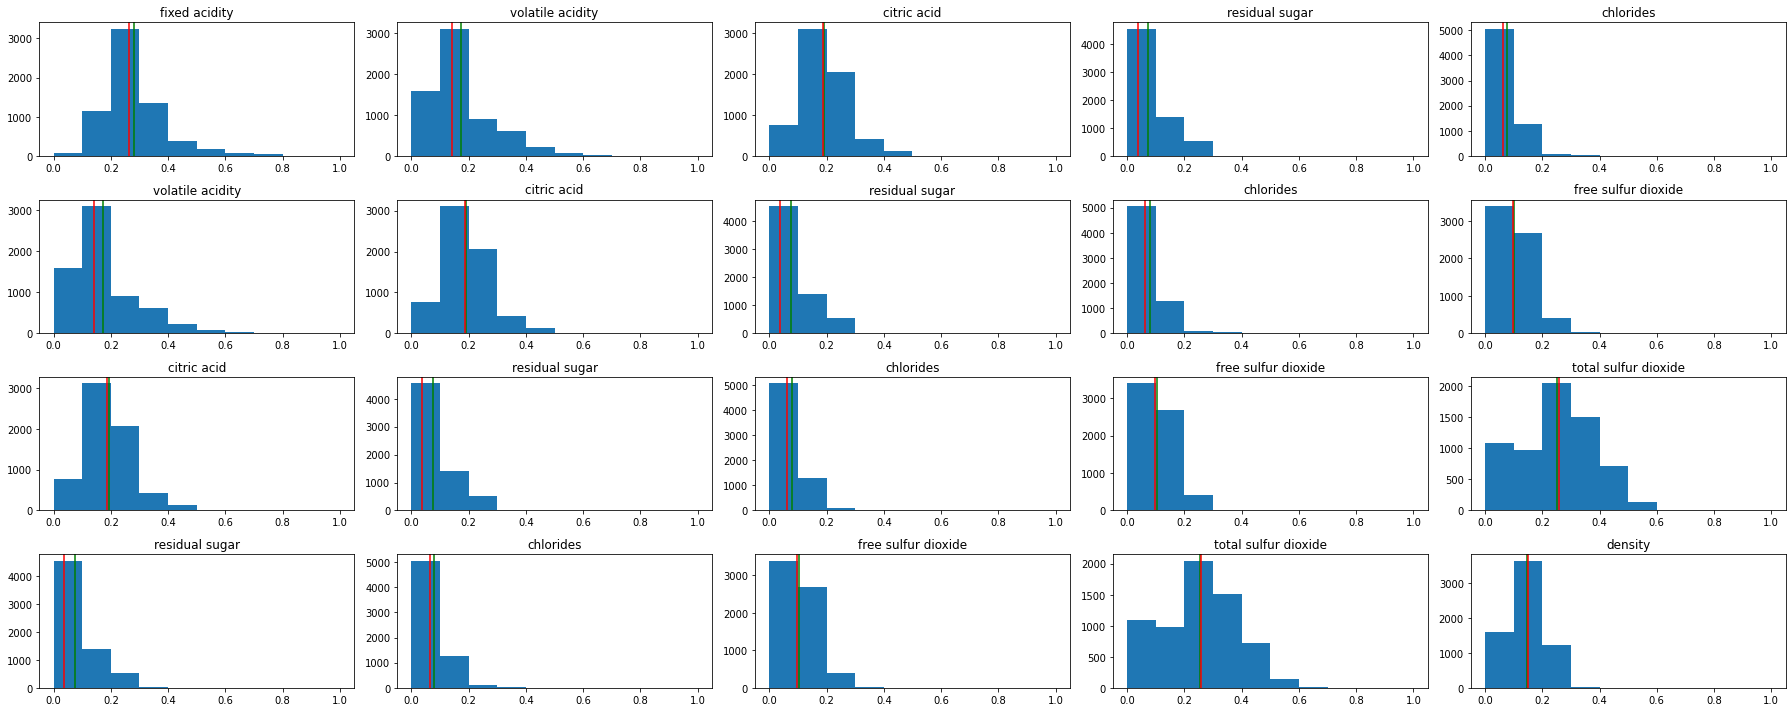

In [80]:
spreed_show(min_max_scaled_data, 4, 5, min_max_scaled_data.columns)


In [72]:
def tabled_fisher_test(data):
    for i in range(len(data.columns)-1):
        for j in range(i+1, len(data.columns)):
            print(data.columns[i], 
                  data.columns[j], 
                  scipy.stats.fisher_exact(data[np.array([data.columns[i], 
                                                          data.columns[j]])]))


In [73]:
min_max_scaled_data.to_csv('../DATA/scaled_data.csv', index=False)
